In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#User DataFrame
fileu =r'C:\Users\ENQRRUH\Desktop\Project Python\users.dat'
users = pd.read_csv(fileu, sep = '::', engine='python',names=['user_id','Sex', 'Age', 'Y', 'Zip_code'])

#checking for any discripency in the data
users.isnull().sum()
users.shape

(6040, 5)

In [2]:
#Ratings Dataframe
filer =r'C:\Users\ENQRRUH\Desktop\Project Python\ratings.dat'
ratings= pd.read_csv(filer, sep = '::', engine='python',names = ['user_id', 'movie_id', 'rating', 'unix_timestamp'])

ratings.isnull().sum()
ratings.shape

(1000209, 4)

In [8]:
#Movies Dataframe
filem =r'C:\Users\ENQRRUH\Desktop\Project Python\movies.dat'
movies= pd.read_csv(filem, sep = '::', engine='python',names = ['movie_id', 'title', 'genres'])

movies.isnull().sum()
movies.shape

(3883, 3)

In [5]:
#Dropping the Column Unix_Timestamp as its not needed
del ratings['unix_timestamp']
ratings.head(5)

,user_id,movie_id,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [13]:
#Merging the Datasets to form final Dataset
movie_ratings = pd.merge(movies, ratings,on ='movie_id', how ='left')
movie_stats = pd.merge(movie_ratings, users, on ='user_id')
movie_ratings.head()
movie_stats.head()
movie_stats.isna().any()
movie_stats.shape

(1000209, 10)

In [9]:
#•	Visualize user age distribution
age_group = users.groupby('Age').size()
age_group

Age
1      222
18    1103
25    2096
35    1193
45     550
50     496
56     380
dtype: int64

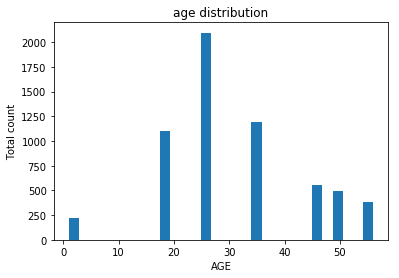

In [10]:
plt.hist(data=age_group,x=users.Age, bins=30)
plt.xlabel('AGE')
plt.ylabel('Total count')
plt.title('age distribution')
plt.show()

In [11]:
#•	Visualize overall rating by users
user_group = ratings.groupby(['user_id']).size()
user_group.tail(15)

user_id
6026     81
6027     36
6028     47
6029     31
6030    115
6031     51
6032    104
6033     60
6034     21
6035    280
6036    888
6037    202
6038     20
6039    123
6040    341
dtype: int64

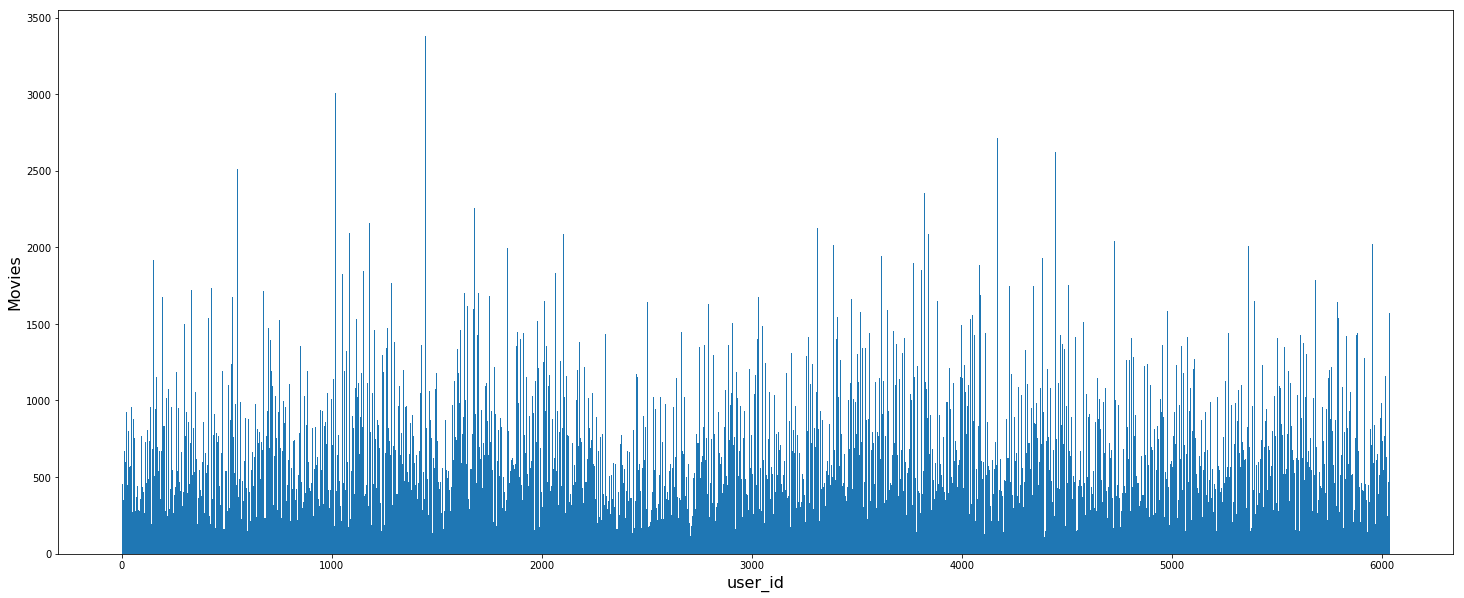

In [18]:
#it shows 6040 users rating the 3883 movies
plt.figure(figsize=(25,10))
plt.hist(x=[ratings.user_id], bins=1400)
plt.xlabel('user_id', fontsize=16)
plt.ylabel('Movies', fontsize=16)
plt.show()

In [13]:
#•	Find and visualize the user rating of the movie “Toy Story”
#total ratings for toystory
toystory_data = ratings[ratings.movie_id==1]
toystory_data.head(5)

,user_id,movie_id,rating
40,1,1,5
469,6,1,4
581,8,1,4
711,9,1,5
837,10,1,5


In [14]:
#getting the size of the rating 
toystory_data.groupby('rating').size()

rating
1     16
2     61
3    345
4    835
5    820
dtype: int64

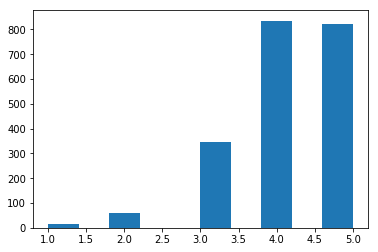

In [16]:
#plotting
plt.hist(x=toystory_data['rating'])
plt.show()

In [22]:
#•	Find and visualize the viewership of the movie “Toy Story” by age group
#select only 'Toystory' data
viewership = pd.merge(ratings,users,on ='user_id', how ='left')
viewership_of_toystory = viewership[viewership['movie_id'] == 1]
viewership_of_toystory.head(5)

,user_id,movie_id,rating,unix_timestamp,Sex,Age,Y,Zip_code
40,1,1,5,978824268,F,1,10,48067
469,6,1,4,978237008,F,50,9,55117
581,8,1,4,978233496,M,25,12,11413
711,9,1,5,978225952,M,25,17,61614
837,10,1,5,978226474,F,35,1,95370


In [23]:
viewership_of_toystory.groupby('Age').size()

Age
1     112
18    448
25    790
35    423
45    143
50    108
56     53
dtype: int64

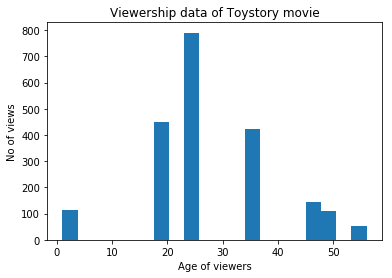

In [24]:
#plotting
plt.hist(x=viewership_of_toystory['Age'], data=viewership_of_toystory, bins=20)
plt.xlabel("Age of viewers")
plt.ylabel("No of views")
plt.title("Viewership data of Toystory movie")
plt.show()

In [5]:
#Grouping the Movies and Finding their mean to find the top 25
Movie_rating = ratings.groupby(['movie_id'])
avg = Movie_rating.agg({'rating':'mean'})
top =avg.sort_values('rating',ascending=False)[:25]
top

,rating
movie_id,
989,5.000000
3881,5.000000
1830,5.000000
3382,5.000000
787,5.000000
3280,5.000000
3607,5.000000
3233,5.000000
3172,5.000000


In [6]:
#Merging the above data with Movies dataset to get complete info
pd.merge(top, movies, how='left', left_on=['movie_id'],right_on=['movie_id'])

,movie_id,rating,title,genres
0,989,5.000000,Schlafes Bruder (Brother of Sleep) (1995),Drama
1,3881,5.000000,Bittersweet Motel (2000),Documentary
2,1830,5.000000,Follow the Bitch (1998),Comedy
3,3382,5.000000,Song of Freedom (1936),Drama
4,787,5.000000,"Gate of Heavenly Peace, The (1995)",Documentary
5,3280,5.000000,"Baby, The (1973)",Horror
6,3607,5.000000,One Little Indian (1973),Comedy|Drama|Western
7,3233,5.000000,Smashing Time (1967),Comedy
8,3172,5.000000,Ulysses (Ulisse) (1954),Adventure
9,3656,5.000000,Lured (1947),Crime


In [8]:
#•	Find the rating for a particular user of user id = 2696
user = ratings[ratings['user_id']==2696]
user.head()

,user_id,movie_id,rating,unix_timestamp
440667,2696,1258,4,973308710
440668,2696,1270,2,973308676
440669,2696,1617,4,973308842
440670,2696,1625,4,973308842
440671,2696,1644,2,973308920


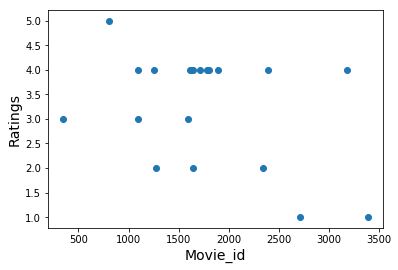

In [13]:
#o	Visualize the rating data by user of user id = 269
plt.scatter(x=user['movie_id'], y=user['rating'])
plt.xlabel('Movie_id', fontsize=14)
plt.ylabel('Ratings', fontsize=14)
plt.show()

In [ ]:
Movie_rating = ratings.groupby(['movie_id'])